# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [44]:
##Identify key drivers for used car prices
##Create a predictive model to discern the factors influencing used car prices using the vehicle.csv dataset. 


In [2]:
# Objective: Analyzing Car Dealership Dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import set_config
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime

import warnings

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


In [3]:
##Vehicles.csv dataset is provided from Kaggle
##The vehicles.csv dataset contains information on 426K cars 
dataset = pd.read_csv('data/vehicles_short.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194965 entries, 0 to 194964
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            194965 non-null  int64  
 1   region        194965 non-null  object 
 2   price         194965 non-null  int64  
 3   year          194965 non-null  int64  
 4   manufacturer  190486 non-null  object 
 5   model         193854 non-null  object 
 6   condition     118523 non-null  object 
 7   cylinders     101162 non-null  object 
 8   fuel          193654 non-null  object 
 9   odometer      193985 non-null  float64
 10  title_status  191940 non-null  object 
 11  transmission  194060 non-null  object 
 12  VIN           153636 non-null  object 
 13  drive         136411 non-null  object 
 14  size          37109 non-null   object 
 15  type          166063 non-null  object 
 16  paint_color   144385 non-null  object 
 17  state         194965 non-null  object 
dtypes: f

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
##Display top few records
dataset.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7314702653,anchorage / mat-su,13000,2011,honda,civic si sedan,excellent,4 cylinders,gas,80000.0,clean,manual,NaN,fwd,compact,sedan,red,ak
1,7308024595,anchorage / mat-su,13000,2018,chevrolet,cruze ls sedan 4d,excellent,4 cylinders,gas,5100.0,salvage,automatic,NaN,fwd,compact,sedan,silver,ak
2,7316781772,phoenix,13000,2016,subaru,impreza hatchback,excellent,4 cylinders,gas,81000.0,lien,manual,JF1GPAA6XG8260734,4wd,full-size,hatchback,white,az
3,7316469404,phoenix,13000,2013,infiniti,g37 sedan x,good,6 cylinders,gas,100543.0,clean,automatic,JN1CV6AR9DM757818,NaN,NaN,sedan,blue,az
4,7316346455,phoenix,13000,2011,subaru,wrx,good,4 cylinders,gas,129000.0,clean,manual,JF1GR7E68BG814360,4wd,full-size,sedan,silver,az


In [5]:
dataset.shape

(194965, 18)

In [6]:
##Find out cardinality of each column in the dataset
# Calculate cardinality (number of unique values) for each column
cardinality = dataset.nunique()
# Print or display the results
print("Cardinality of each column:")
print(cardinality)
##odometer and price has numeric values
##id, model, vin has high cadinality (categorical), and will not use for detailed analysis


Cardinality of each column:
id              194965
region             404
price            10894
year                13
manufacturer        38
model            12270
condition            6
cylinders            8
fuel                 5
odometer         52720
title_status         6
transmission         3
VIN              54076
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


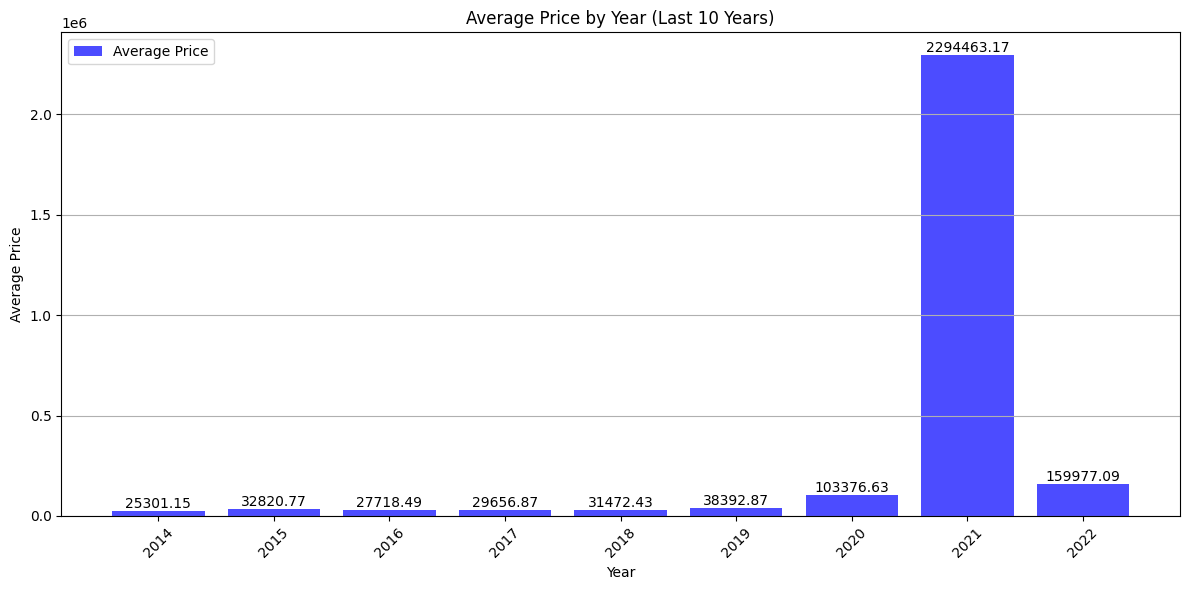

In [7]:
warnings.filterwarnings('ignore')

##Cleanup, so that the graph's can have meaningful data
##Below visualization for numeric columns
# Drop NaN values from the dataset
cleaned_dataset = dataset.dropna(subset=['year', 'price'])

# Ensure year is in yyyy format
cleaned_dataset['year'] = cleaned_dataset['year'].astype(int)

dataset = cleaned_dataset

# Get the current year
current_year = datetime.now().year

# Filter to show only the last 10 years
last_10_years = cleaned_dataset[cleaned_dataset['year'] >= (current_year - 10)]

# Group by year and calculate the average price
average_price_per_year = last_10_years.groupby('year')['price'].mean().reset_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(average_price_per_year['year'].astype(str), average_price_per_year['price'], color='blue', alpha=0.7)

# Add title and labels
plt.title('Average Price by Year (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Add a legend (if applicable)
plt.legend(['Average Price'], loc='upper left')

# Show grid lines for better readability
plt.grid(axis='y')

# Adjust layout
plt.tight_layout()

# Save the figure directly to the 'images' folder
plt.savefig('images/average_price_by_year.png')

# Show the plot
plt.show()
# Print average priced categories with year, price, and type
print("Average price by year. The graph shows in 2021, cars were priced high ")


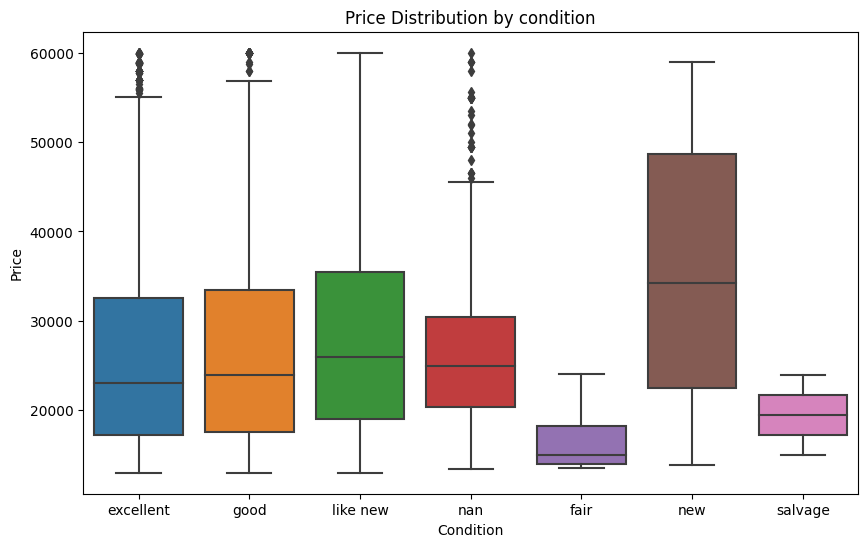

<Figure size 640x480 with 0 Axes>

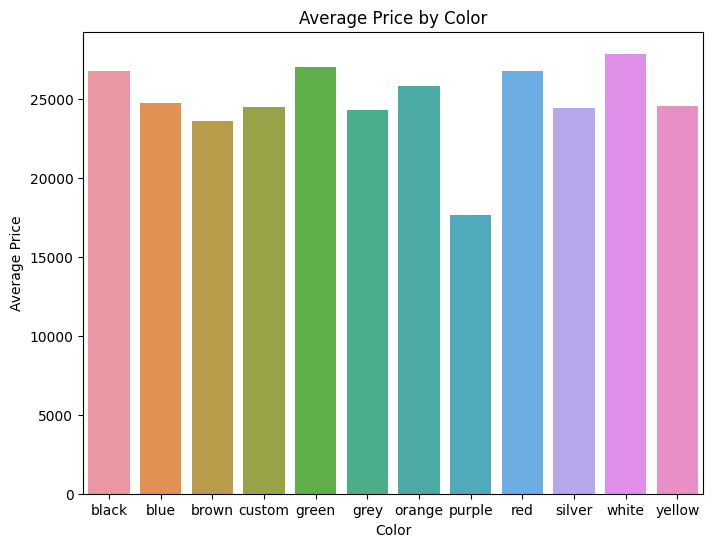

New Cars are priced high 
Color of the car has very less impact on the purchase of car 


<Figure size 640x480 with 0 Axes>

In [14]:
# Box plot to visualize price distribution by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=dataset)
plt.title('Price Distribution by condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()
# Save the figure directly to the 'images' folder
plt.savefig('images/Car Prices by Condition of the car')

##Good cars are priced more

# Bar plot to visualize average price by Color
plt.figure(figsize=(8, 6))
mean_price_by_color = dataset.groupby('paint_color')['price'].mean().reset_index()
sns.barplot(x='paint_color', y='price', data=mean_price_by_color)
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()
plt.savefig('images/Car Prices by Color of the car')
##Black and White cars looks to be most in demand, hence priced high

print("New Cars are priced high ")
print("Color of the car has very less impact on the purchase of car ")




In [15]:
# Display the average price per bin
# Calculate the average price per year (bin)
average_price_per_bin = dataset.groupby('year')['price'].mean()

# Round the average prices to 2 decimal places
average_price_per_bin = average_price_per_year.round(2)

# Display the average price per bin
print(average_price_per_bin)

   year       price
0  2014    25301.15
1  2015    32820.77
2  2016    27718.49
3  2017    29656.87
4  2018    31472.43
5  2019    38392.87
6  2020   103376.63
7  2021  2294463.17
8  2022   159977.09


<Figure size 640x480 with 0 Axes>

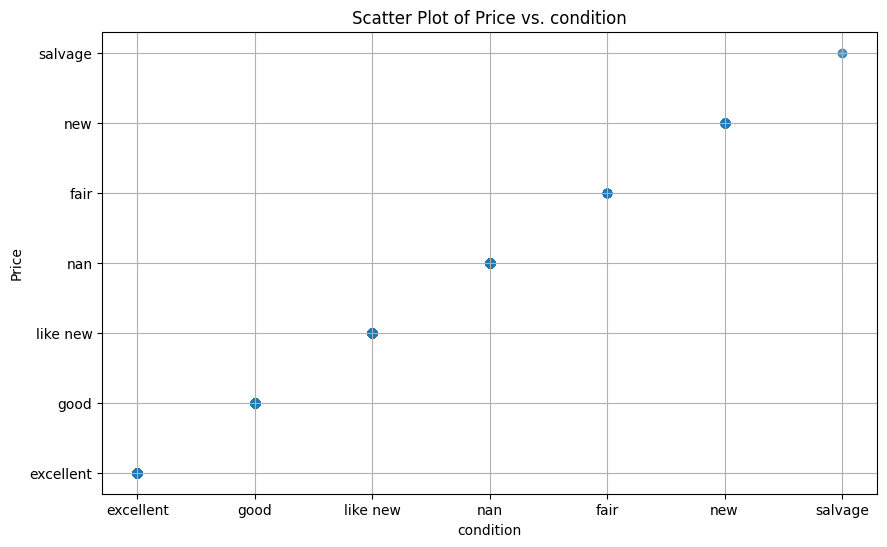

Outliers in 'price':
                id  price  year manufacturer         model  condition   
186835  7311847460  55500  2017         ford  shelby gt350   like new  \
186837  7317010650  55500  2019          ram  1500 limited  excellent   
186856  7303640576  55605  2019         ford         f-150        nan   

        cylinders fuel  odometer transmission       size    type paint_color   
186835          8  gas    4500.0       manual    compact   coupe       white  \
186837          8  gas   21000.0    automatic  full-size  pickup         red   
186856          6  gas   28601.0    automatic  full-size  pickup         red   

       state  
186835    mi  
186837    nc  
186856    tx  


In [16]:
## Handle outliers (Example for 'price' column)
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR)))]

# Convert 'condition' column to string
dataset['condition'] = dataset['condition'].astype(str)

# Save the figure
plt.savefig('images/price_Outliers') 

# Create a scatter plot to check any outliers
plt.figure(figsize=(10, 6))
plt.scatter(dataset['condition'], dataset['condition'], alpha=0.5)
plt.title('Scatter Plot of Price vs. condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Identify outliers in 'price' using Interquartile Range (IQR)
Q1_price = dataset['price'].quantile(0.25)
Q3_price = dataset['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
outliers_price = dataset[(dataset['price'] < (Q1_price - 1.5 * IQR_price)) | (dataset['price'] > (Q3_price + 1.5 * IQR_price))]
print("Outliers in 'price':")
print(outliers_price)
plt.show()


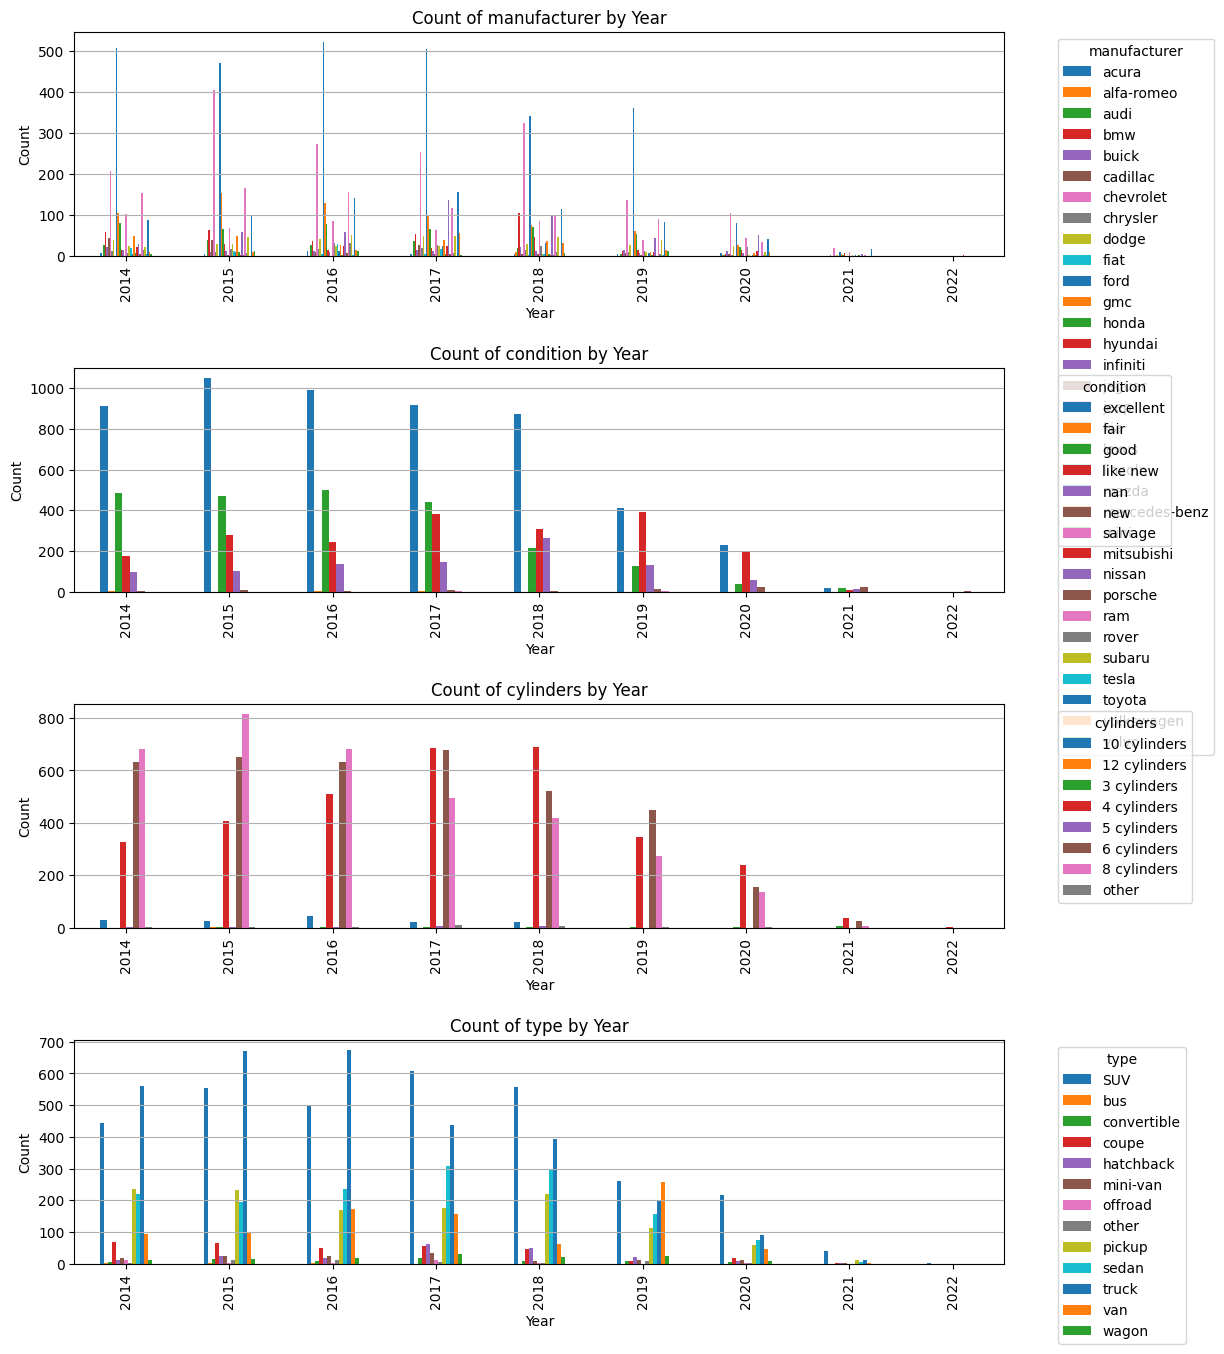

Average priced categories:
manufacturer: tesla in None with average price $43208.56 (Type: None)
condition: new in None with average price $35639.52 (Type: None)
cylinders: 12 cylinders in 2015 with average price $50000.00 (Type: SUV)
type: truck in None with average price $35257.84 (Type: None)


In [11]:
# Ignore warnings
warnings.filterwarnings('ignore')

# Drop rows with NaN values
dataset = dataset.dropna()

# Convert year to integer to remove decimals
dataset['year'] = dataset['year'].astype(int)

# Get the current year for filtering
current_year = datetime.now().year

# Filter to show only the last 10 years
last_10_years = dataset[dataset['year'] >= (current_year - 10)]

# List of categorical columns to plot
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'type']

# Create a dictionary to store average priced categories
average_price_categories = {}

# Create a figure for subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 4 * len(categorical_columns)))

# Loop through each categorical column and create a bar plot
for ax, column in zip(axes, categorical_columns):
    count_data = last_10_years.groupby(['year', column]).size().unstack(fill_value=0)
    
    # Create a bar plot
    count_data.plot(kind='bar', ax=ax)
    
    # Set titles and labels
    ax.set_title(f'Count of {column} by Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y')

    # Initialize variables to find average priced category
    average_price = None
    average_category = None
    average_year = None
    average_type = None

    # Calculate average prices for categories
    for idx in count_data.columns:
        # Get the average price for the current category
        avg_price = last_10_years[last_10_years[column] == idx]['price'].mean()

        if not pd.isna(avg_price):  # Ensure the average price is not NaN
            if average_price is None or (avg_price > average_price):
                average_price = avg_price
                average_category = idx

                # Find the entries associated with the average price
                avg_entry = last_10_years[(last_10_years[column] == idx) & (last_10_years['price'] == avg_price)]
                if not avg_entry.empty:  # Check if there are entries
                    average_year = avg_entry['year'].values[0]
                    average_type = avg_entry['type'].values[0]

    # Store the average priced category for each column
    if average_category is not None:  # Ensure there's a valid category
        average_price_categories[column] = (average_category, average_year, average_price, average_type)

# Adjust layout to increase distance between plots
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between plots

# Save the figure
plt.savefig('images/categorical_counts_by_year.png') 

# Show the plot
plt.show()

# Print average priced categories with year, price, and type
print("Average priced categories:")
for column, (category, year, price, car_type) in average_price_categories.items():
    print(f"{column}: {category} in {year} with average price ${price:.2f} (Type: {car_type})")

In [55]:
##Columns id, model, odometer, VIN have hight cardinality and hence these columns could be dropped
##Price is the dependent variable
##Key Drivers of the data set by observation manufacturer, condition, cylinders, transmission, type, paint_color, state, year

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
warnings.filterwarnings('ignore')
## Identify and Remove Duplicates
dataset.drop_duplicates(inplace=True)

## Clean 'cylinders' column
# Remove non-numeric characters from 'cylinders' column and convert to numeric
dataset['cylinders'] = dataset['cylinders'].astype(str).str.replace(r'\D', '', regex=True)  # Remove non-numeric characters
dataset['cylinders'] = pd.to_numeric(dataset['cylinders'], errors='coerce')  # Convert to numeric, coerce errors to NaN
# Convert 'cylinders' column to absolute values (if it's not already)
dataset['cylinders'] = dataset['cylinders'].abs()

# Replace NaN values ian 'cylinders' column with 0
dataset['cylinders'] = dataset['cylinders'].fillna(0)

# Convert 'cylinders' column to integer type
dataset['cylinders'] = dataset['cylinders'].astype(int)

## Drop unnecessary columns
columns_to_drop = ['region','title_status', 'drive','VIN']
dataset.drop(columns=columns_to_drop, inplace=True)



KeyError: "['region', 'title_status', 'drive', 'VIN'] not found in axis"

In [57]:
dataset.describe()

,id,price,year,cylinders,odometer
count,3.698400e+04,36984.000000,36984.000000,36984.000000,3.698400e+04
mean,7.311469e+09,15070.975395,2011.318192,5.994187,1.074069e+05
std,4.292766e+06,12032.148948,6.989637,1.713126,9.772818e+04
min,7.301592e+09,0.000000,1905.000000,0.000000,0.000000e+00
25%,7.308056e+09,6270.000000,2008.000000,4.000000,6.587650e+04
50%,7.312130e+09,11995.000000,2013.000000,6.000000,1.039660e+05
75%,7.315093e+09,21990.000000,2016.000000,8.000000,1.408950e+05
max,7.317099e+09,56000.000000,2022.000000,12.000000,9.999999e+06


In [58]:
print(dataset.columns)

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')


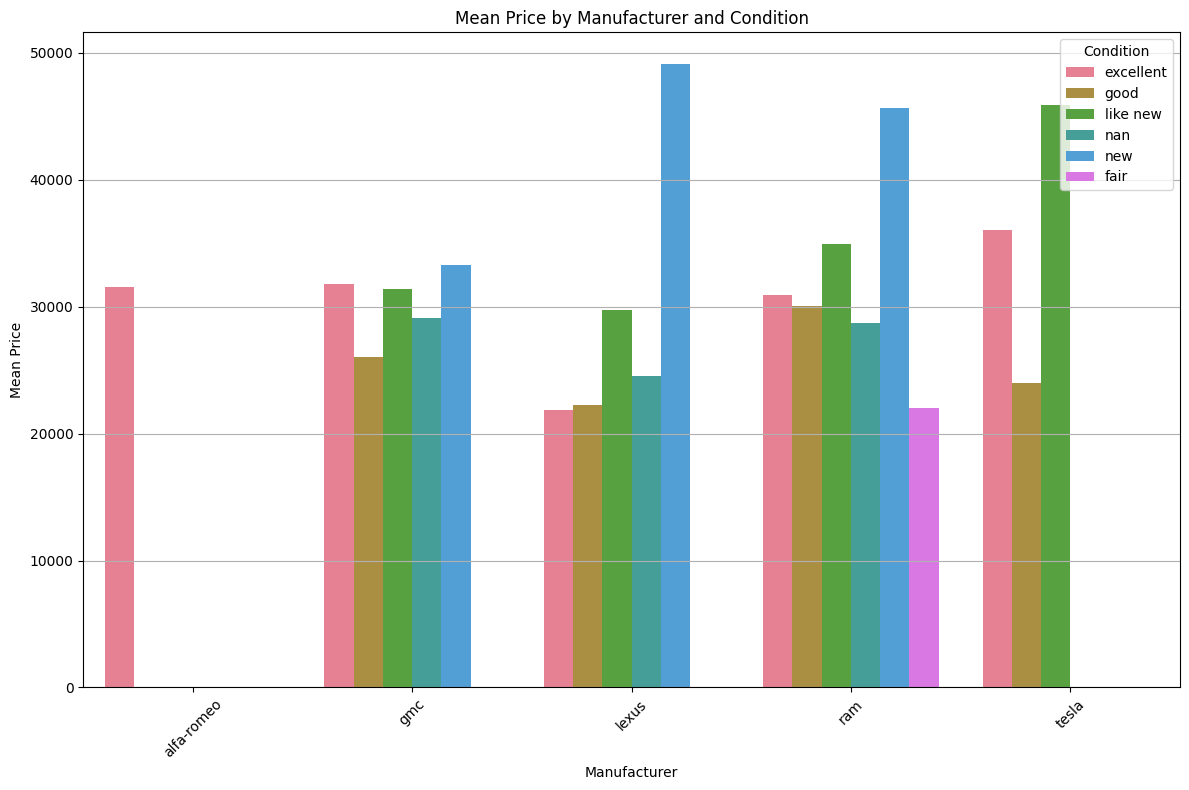

In [18]:
# Calculate mean price by manufacturer and condition
mean_price_by_manufacturer_condition = dataset.groupby(['manufacturer', 'condition'])['price'].mean().reset_index()

# Get top 5 manufacturers based on mean price
top_5_manufacturers = mean_price_by_manufacturer_condition.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(5).index

# Filter mean prices for top 5 manufacturers
top_5_manufacturer_condition_prices = mean_price_by_manufacturer_condition[mean_price_by_manufacturer_condition['manufacturer'].isin(top_5_manufacturers)]

# Plotting grouped bar plot
plt.figure(figsize=(12, 8))
# Save the figure
plt.savefig('images/Top_5_manufacturers.png') 

sns.barplot(x='manufacturer', y='price', hue='condition', data=top_5_manufacturer_condition_prices, palette='husl')
plt.title('Mean Price by Manufacturer and Condition')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Condition',  loc = 'upper right')
plt.grid(axis='y')
plt.tight_layout()
##Tesla and asto martin are most expensive, and in good condition. Most liked by customer

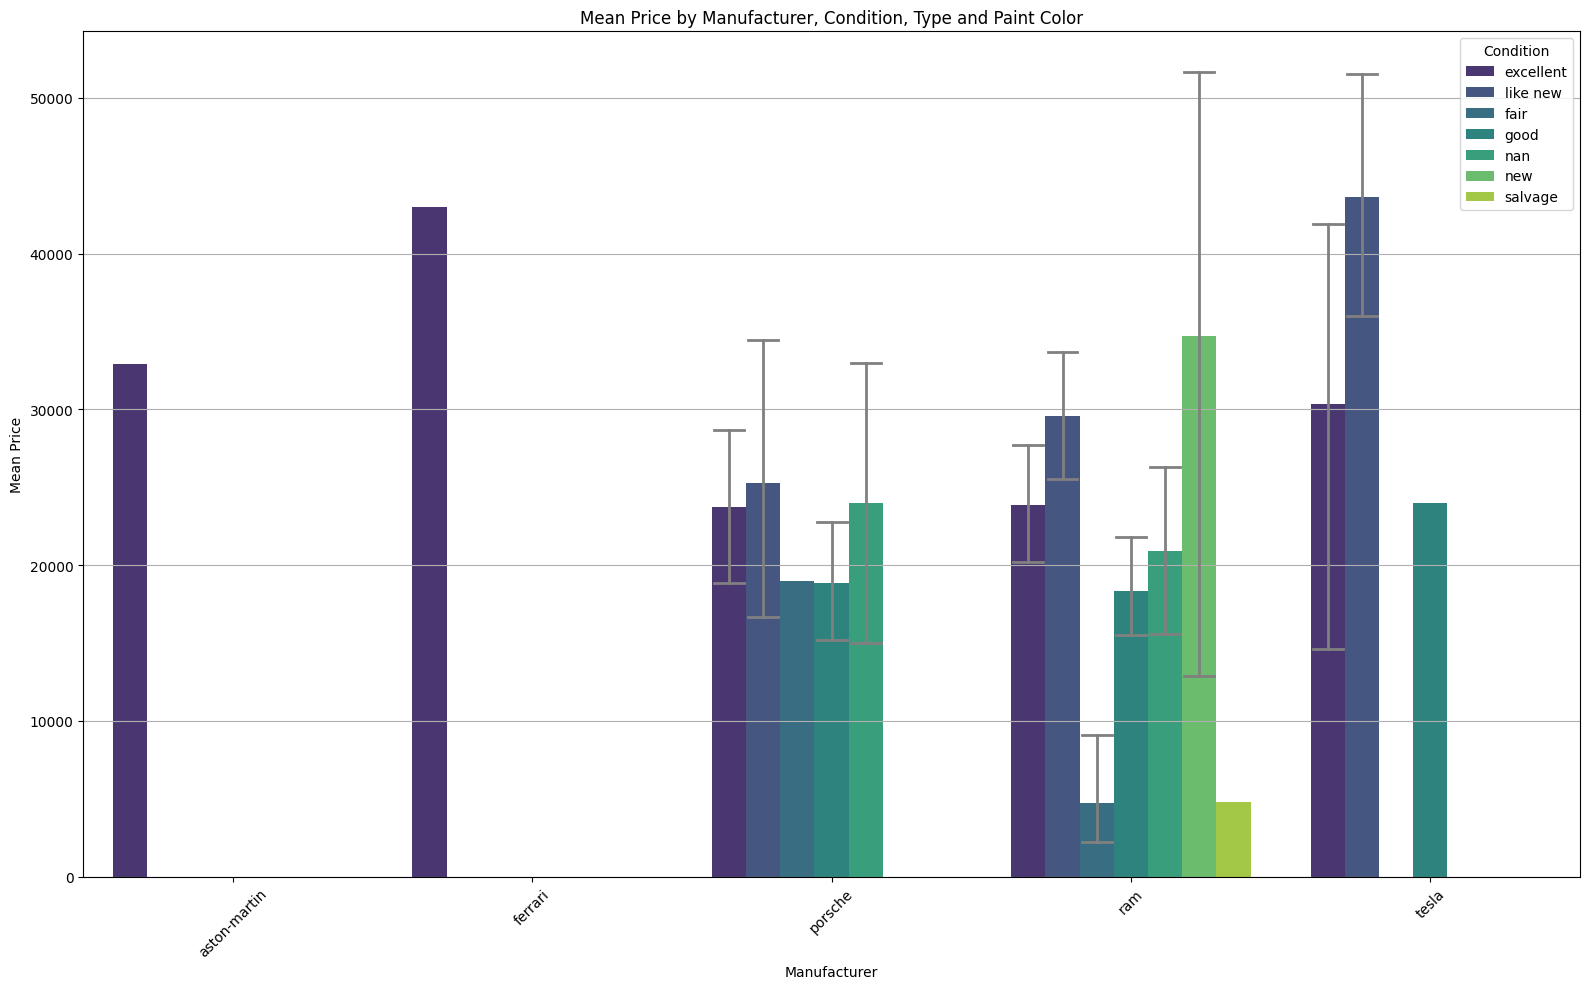

In [60]:
# Calculate mean price by manufacturer, condition, type, and paint_color
mean_price_by_attributes = dataset.groupby(['manufacturer', 'condition', 'type', 'paint_color'])['price'].mean().reset_index()

# Get top 5 manufacturers based on mean price
top_5_manufacturers = mean_price_by_attributes.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(5).index

# Filter mean prices for top 5 manufacturers
top_5_manufacturer_attributes_prices = mean_price_by_attributes[mean_price_by_attributes['manufacturer'].isin(top_5_manufacturers)]

# Plotting bar plot
plt.figure(figsize=(16, 10))
# Save the figure
plt.savefig('images/Mean Price for top 5 manufacturers.png') 

sns.barplot(x='manufacturer', y='price', hue='condition', 
            data=top_5_manufacturer_attributes_prices, 
            palette='viridis', errcolor='grey', errwidth=2, capsize=0.1)
plt.title('Mean Price by Manufacturer, Condition, Type and Paint Color')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Condition', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [61]:
dataset.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,size,type,paint_color,state
126,7305672709,0,2018,chevrolet,express cargo van,like new,6,gas,68472.0,automatic,full-size,van,white,al
127,7305672266,0,2019,chevrolet,express cargo van,like new,6,gas,69125.0,automatic,full-size,van,white,al
128,7305672252,0,2018,chevrolet,express cargo van,like new,6,gas,66555.0,automatic,full-size,van,white,al
215,7316482063,4000,2002,toyota,echo,excellent,4,gas,155000.0,automatic,compact,sedan,blue,al
219,7316429417,2500,1995,bmw,525i,fair,6,gas,110661.0,automatic,mid-size,sedan,white,al


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separate features (X) and target (y)
X = dataset.drop(columns=['price'])  # Features
y = dataset['price']  # Target variable

# Define categorical and numerical features
categorical_features = ['manufacturer','odometer', 'model', 'condition', 'cylinders', 'fuel',  'transmission', 'size', 'type', 'paint_color', 'state']
numerical_features = ['cylinders', 'year_only','age']

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Preprocessing pipeline for numerical features
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric features (replace with your actual numeric feature names or indices)
numeric_features = X.columns.tolist()  # Assuming all columns in X are numeric for this example

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a ColumnTransformer to apply preprocessing steps to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        # Add more transformers for categorical features if needed
    ])

In [102]:
dataset.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,size,type,paint_color,state,age
126,0,2018,7,1986,3,4,2,4547,0,1,11,10,1,5
127,0,2019,7,1986,3,4,2,4602,0,1,11,10,1,4
128,0,2018,7,1986,3,4,2,4364,0,1,11,10,1,5
215,4000,2002,38,1650,0,2,2,13941,0,0,9,1,1,21
219,2500,1995,4,398,1,4,2,9362,0,2,9,10,1,28


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [20]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_features}

# Apply label encoding
for col in categorical_features:
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

# Display the transformed DataFrame
print(dataset)


                id  price  year  manufacturer  model  condition  cylinders   
2       7316781772  13000  2016            29   1285          0          2  \
4       7316346455  13000  2011            29   2201          2          2   
18      7315810354  13000  2011            22    532          0          5   
91      7316314595  13000  2011             3      3          0          4   
108     7316787610  13000  2013            10    799          0          2   
...            ...    ...   ...           ...    ...        ...        ...   
186729  7315234546  55000  2017            10   1061          3          5   
186740  7317007461  55000  2019            27     30          4          5   
186835  7311847460  55500  2017            10   1755          3          5   
186837  7317010650  55500  2019            27     31          0          5   
186856  7303640576  55605  2019            10    877          4          4   

        fuel  odometer  transmission  size  type  paint_color  

In [105]:
dataset.info()
##price	year	manufacturer	model	condition	cylinders	fuel	odometer	transmission	size	type	paint_color	state	age


<class 'pandas.core.frame.DataFrame'>
Index: 36984 entries, 126 to 426836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         36984 non-null  int64
 1   year          36984 non-null  int64
 2   manufacturer  36984 non-null  int64
 3   model         36984 non-null  int64
 4   condition     36984 non-null  int64
 5   cylinders     36984 non-null  int64
 6   fuel          36984 non-null  int64
 7   odometer      36984 non-null  int64
 8   transmission  36984 non-null  int64
 9   size          36984 non-null  int64
 10  type          36984 non-null  int64
 11  paint_color   36984 non-null  int64
 12  state         36984 non-null  int64
 13  age           36984 non-null  int64
dtypes: int64(14)
memory usage: 4.2 MB


In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Assuming 'dataset' is already loaded

# Create the 'age' column based on the 'year' column
current_year = 2023
dataset['age'] = current_year - dataset['year']

# Display the updated dataset (optional)
print(dataset.head())

# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Check data types
print("Data types of each column:")
print(dataset.dtypes)

# Identify potential issues with columns
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        unique_values = dataset[col].unique()
        print(f"Unique values in '{col}': {unique_values}")

# Ensure the necessary columns exist in the dataset
required_columns = ['price', 'year', 'manufacturer', 'model', 'condition', 
                    'cylinders', 'fuel', 'odometer', 'transmission', 
                    'size', 'type', 'paint_color', 'state', 'age']

missing_columns = [col for col in required_columns if col not in dataset.columns]
if missing_columns:
    raise ValueError(f"The following required columns are missing from the dataset: {missing_columns}")

# Separate features (X) and target variable (y)
X = dataset[['year', 'manufacturer', 'model', 'condition', 'cylinders', 
              'fuel', 'odometer', 'transmission', 'size', 'type', 
              'paint_color', 'state', 'age']]
y = dataset['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features based on their data types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Mean for numeric features
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Constant for categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize models: Linear Regression, Ridge, and Lasso
models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),
    "Ridge Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', Ridge())]),
    "Lasso Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', Lasso())])
}

# Fit and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


             id  price  year  manufacturer  model  condition  cylinders  fuel   
2    7316781772  13000  2016            29   1285          0          2     2  \
4    7316346455  13000  2011            29   2201          2          2     2   
18   7315810354  13000  2011            22    532          0          5     2   
91   7316314595  13000  2011             3      3          0          4     2   
108  7316787610  13000  2013            10    799          0          2     2   

     odometer  transmission  size  type  paint_color  state  age  
2        3723             1     1     4           10      3    7  
4        5790             1     1     9            9      3   12  
18       5294             0     1     3            0      4   12  
91       4161             0     3     3            5      9   12  
108      3396             0     3     0           10     13   10  
Missing values in each column:
Series([], dtype: int64)
Data types of each column:
id              int64
price 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [22]:
# Define the results of each model
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MAE': [6967.27, 6967.29, 6967.21],
    'MSE': [93166710.75, 93166924.73, 93167762.70],
    'RMSE': [9652.29, 9652.30, 9652.34],
    'R²': [0.35, 0.35, 0.35]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Identify the best model based on MAE, MSE, and RMSE
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]

# Print out the results
print("Evaluation of Models:")
print(results_df)

print("\nBest Model Based on MAE:")
print(best_mae_model)

print("\nBest Model Based on MSE:")
print(best_mse_model)

print("\nBest Model Based on RMSE:")
print(best_rmse_model)

# Optionally, you can summarize the overall best model
overall_best_model = best_mae_model  # or change to best_mse_model or best_rmse_model
print("\nOverall Best Model Based on MAE:")
print(overall_best_model)

Evaluation of Models:
               Model      MAE          MSE     RMSE    R²
0  Linear Regression  6967.27  93166710.75  9652.29  0.35
1   Ridge Regression  6967.29  93166924.73  9652.30  0.35
2   Lasso Regression  6967.21  93167762.70  9652.34  0.35

Best Model Based on MAE:
Model    Lasso Regression
MAE               6967.21
MSE            93167762.7
RMSE              9652.34
R²                   0.35
Name: 2, dtype: object

Best Model Based on MSE:
Model    Linear Regression
MAE                6967.27
MSE            93166710.75
RMSE               9652.29
R²                    0.35
Name: 0, dtype: object

Best Model Based on RMSE:
Model    Linear Regression
MAE                6967.27
MSE            93166710.75
RMSE               9652.29
R²                    0.35
Name: 0, dtype: object

Overall Best Model Based on MAE:
Model    Lasso Regression
MAE               6967.21
MSE            93167762.7
RMSE              9652.34
R²                   0.35
Name: 2, dtype: object


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [23]:
import joblib

# Save the model
joblib.dump(model, 'car_price_model.pkl')
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [ ]:
##Deployment :  Readme Document

In [24]:
## Prediction using Lasso Regression Model
# Drop rows where 'year' equals 1900

dataset = dataset[dataset['year'] != 1900]
dataset = dataset[dataset['year'] != 1905]

dataset = dataset[['price', 'manufacturer', 'condition', 'year']]

# Drop rows with NaN values in any of the specified columns
dataset.dropna(subset=['price', 'manufacturer', 'condition', 'year'], inplace=True)

# Reset index after dropping rows
dataset.reset_index(drop=True, inplace=True)

dataset.head()

,price,manufacturer,condition,year
0,13000,29,0,2016
1,13000,29,2,2011
2,13000,22,0,2011
3,13000,3,0,2011
4,13000,10,0,2013


In [25]:
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

# Separate features (X) and target variable (y)
X = dataset.drop('price', axis=1)  # Features
y = dataset['price']  # Target

# Handling NaN values
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Handle unknown categories
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define Lasso model
lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Fit the model
lasso.fit(X_train, y_train)

# Predict on new data (X_test)
y_pred = lasso.predict(X_test)


# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
# Print predicted values and actual values for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


       Actual     Predicted
8361    25995  27845.827754
2807    16900  24715.327834
6290    21995  28335.565590
10428   31900  26552.547615
3014    16990  24715.327834
...       ...           ...
5766    20990  27660.772981
10418   31900  31357.751590
14004   48995  31080.080891
1434    14980  25737.690941
14405   54995  27893.275893

[2885 rows x 2 columns]


In [123]:
dataset.head()

,price,manufacturer,condition,year
0,0,7,3,2018
1,0,7,3,2019
2,0,7,3,2018
3,4000,38,0,2002
4,2500,4,1,1995


In [26]:
# Example: Drop rows with missing values
dataset.dropna(inplace=True)

dataset = dataset[dataset['year'] != 1900]
dataset = dataset[dataset['year'] != 1905]

# Separate features (X) and target (y)
X = dataset.drop(columns=['price'])  # Features
y = dataset['price']  # Target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Apply preprocessing to training and testing sets
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength

# Fit the model on the training data
lasso_model.fit(X_train_processed, y_train)
Lasso(random_state=42)
# Predict on the testing data
y_pred = lasso_model.predict(X_test_processed)

# Calculate Mean Squared Error (MSE) to evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
import warnings
# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
# Example: Prepare new data for prediction (similar preprocessing as before)


# Preprocess the new data
new_data_processed = preprocessor.transform(dataset)

# Print condition of the car (assuming it's from the new data)
print(f"Condition of the car: {dataset['condition'].iloc[0]}")

# Make predictions
predicted_price = lasso_model.predict(new_data_processed)
print(f"Predicted price: ${predicted_price[0]:,.2f}")
##'Condition = 1 - Excellent, 2 = Good '
## for a good car predicted price  = $19,795.11

Mean Squared Error (MSE): 90783740.71274172
Condition of the car: 0
Predicted price: $25,893.10
